In [68]:
# Librerias Necesarias
import os
import pandas as pd
import numpy as np
import utils
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import kagglehub
import kaggle

# 1. Carga de Datos:

In [69]:
# Descarga del dataset desde Kaggle 
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\esteban.vazquez\.cache\kagglehub\datasets\uciml\red-wine-quality-cortez-et-al-2009\versions\2


In [70]:
# Carga del dataset
dataset_path = os.path.join(path, "winequality-red.csv")
df = pd.read_csv(dataset_path)

# 2. Exploración y preprocesamiento de datos:

In [71]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [73]:
duplicados = df.duplicated() # Identificacion de registros duplicados
num_duplicados = duplicados.sum() # Conteo de registros duplicados
print(f"Duplicados verificados: {num_duplicados}")

Duplicados verificados: 240


In [74]:
# Se eliminan los registros duplicados
data = df.drop_duplicates()

In [75]:
# Verificar si se eliminaron los registros duplicados
duplicados = data.duplicated()
# Conteo de registros duplicados en caso de que existan
num_duplicados = duplicados.sum()
print(f"Registros duplicados: {num_duplicados}")

Registros duplicados: 0


Se procedio a la eliminacion de los valores duplicados para evitar lecturas erroneas al momento del entrenamiento de los datos mas adelante.

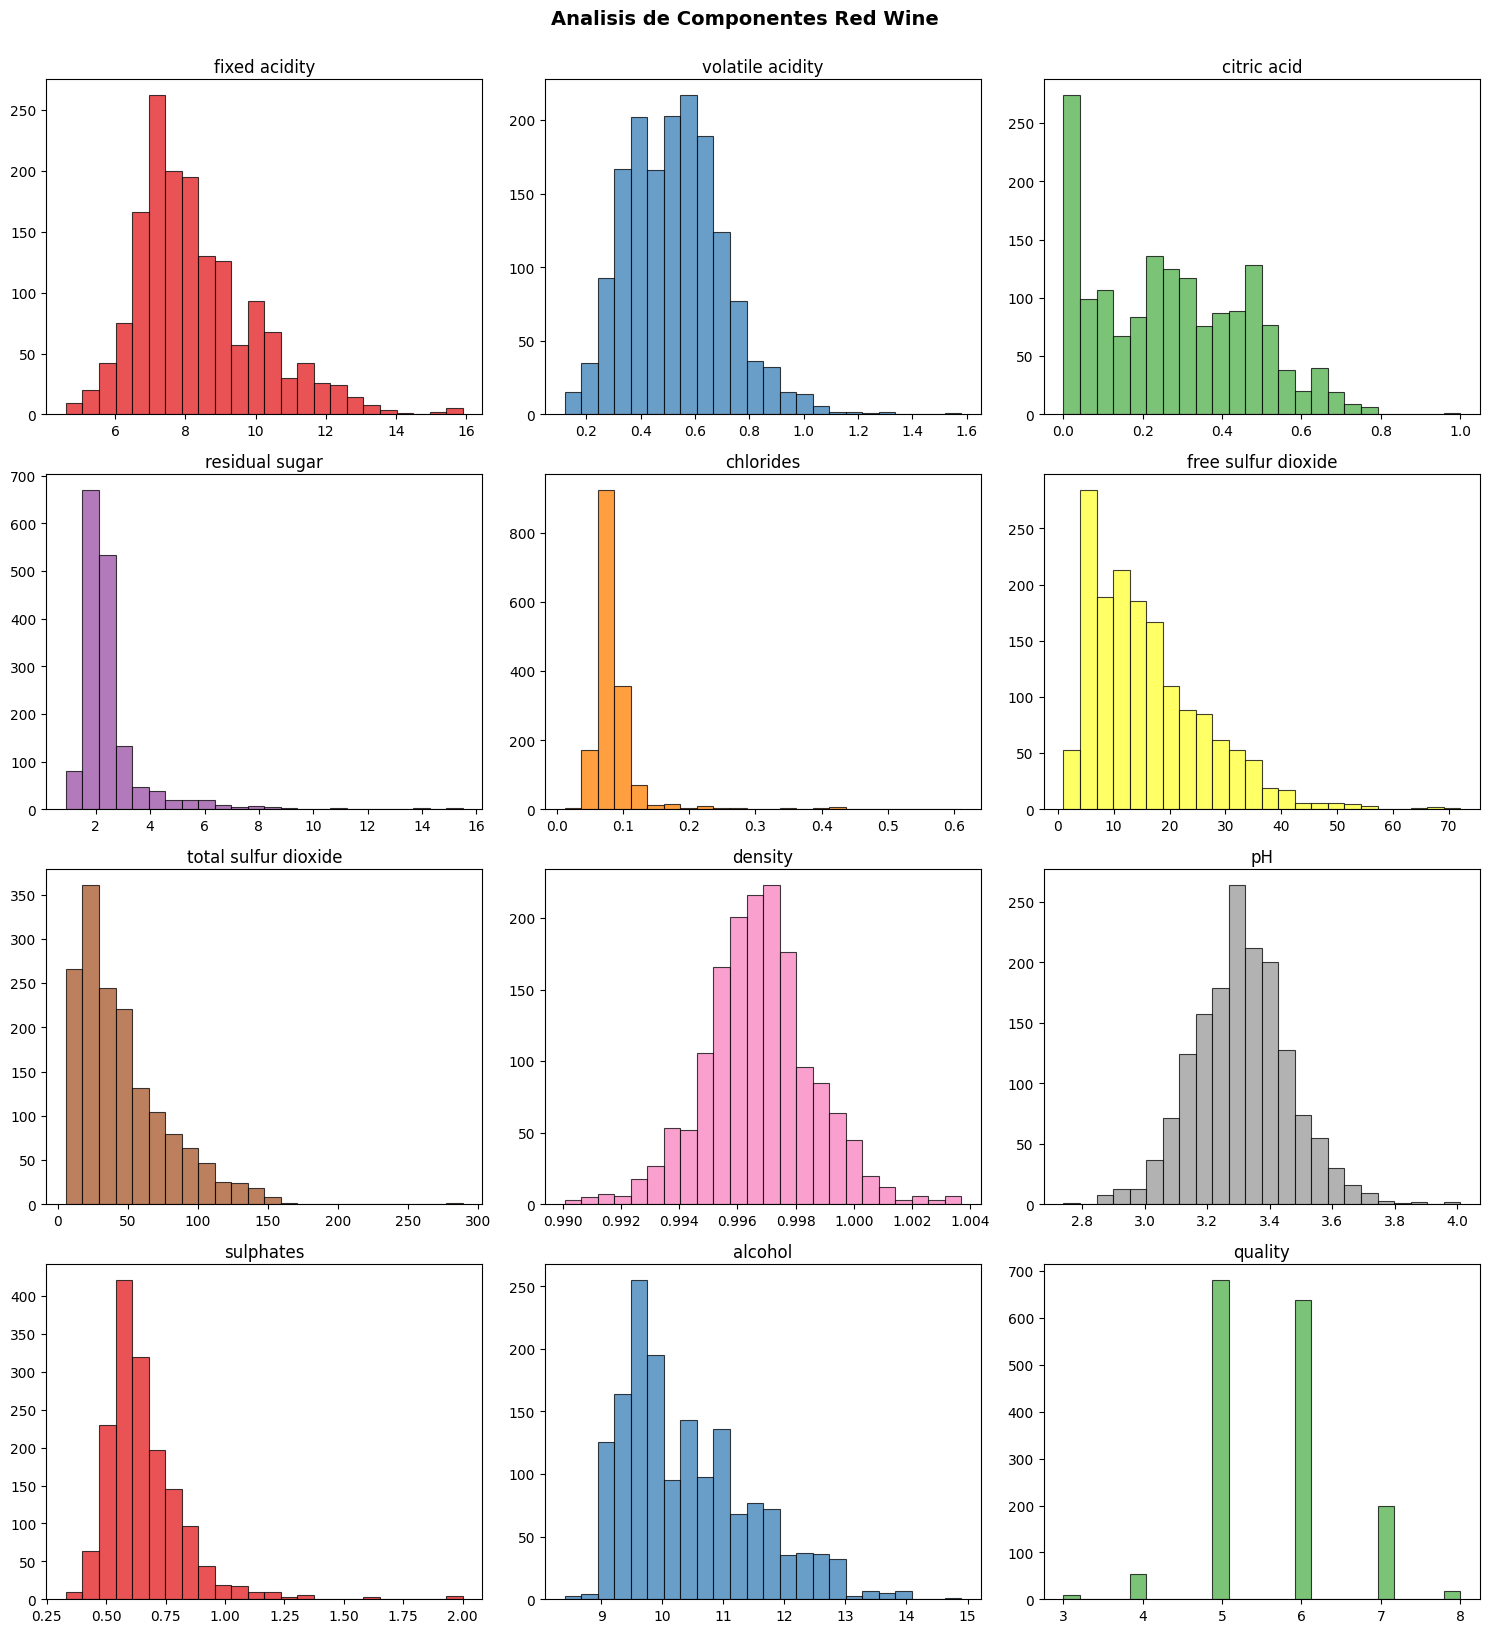

In [76]:
# Graficos de analisis de los componentes del vino
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20)) 
axes = axes.flatten()
colors = sns.color_palette("Set1", len(df.columns))
for i, col in enumerate(df.columns):
    if i < len(axes):  
        # Cambio a escala logaritmica para mejorar la visualizacion
        axes[i].hist(df[col].dropna(), bins='rice', color=colors[i], alpha=0.75, edgecolor='black', linewidth=0.8)
        axes[i].set_title(col, fontsize=12, pad=5)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Titulos de los graficos indicando el analisis de los componentes
fig.suptitle('Analisis de Componentes Red Wine', fontsize=14, fontweight='bold', y= 1)
plt.tight_layout()
plt.show()

## Explicacion del sigificado de los valores visualizados:

## - Fixed Acidity (Acidez Fija):
Representa la concentración de ácidos no volátiles, como el tartárico, que no se evaporan durante la fermentación.
La mayoría de los valores están entre 6 y 10 g/L, lo que sugiere que los vinos de este dataset tienen niveles moderados de acidez fija.

## - Volatile Acidity (Acidez Volátil):
Indica la cantidad de ácidos volátiles, como el ácido acético, responsables del aroma del vino.
Se observa que los valores más comunes están alrededor de 0.4-0.8 g/L. Valores altos pueden afectar negativamente la calidad del vino.

## - Citric Acid (Ácido Cítrico):
Componente que añade frescura y mejora la estabilidad química del vino.
La mayoría de los vinos tienen valores bajos de ácido cítrico (cerca de 0), indicando que no es un componente predominante.

## - Residual Sugar (Azúcar Residual):
Representa la cantidad de azúcar restante después de la fermentación.
Los valores predominantes están por debajo de 2 g/L, lo que sugiere que los vinos en este dataset son principalmente secos.

## - Chlorides (Cloruros):
Indica el contenido de sal en el vino.
Los valores más comunes están por debajo de 0.1 g/L, lo que sugiere un contenido bajo de cloruros, esencial para un buen perfil sensorial.

## - Free Sulfur Dioxide (Dióxido de Azufre Libre):
Se refiere al dióxido de azufre que no está ligado a otros compuestos y protege el vino de la oxidación y bacterias.
La mayoría de los valores están por debajo de 40 ppm, lo cual es típico en vinos de calidad moderada.

## - Total Sulfur Dioxide (Dióxido de Azufre Total):
Representa la suma de dióxido de azufre libre y combinado.
Los valores más comunes están por debajo de 150 ppm, lo que está dentro de los límites aceptables para evitar sabores desagradables.

## - Density (Densidad):
Está relacionada con el contenido de alcohol y azúcar.
La mayoría de los vinos tienen una densidad cercana a 0.995-1.000 g/cm³, que es típica de los vinos secos.

## - pH:
Indica la acidez general del vino.
Los valores típicos están entre 3.0 y 3.5, lo que refleja un nivel adecuado de acidez para conservar y equilibrar los sabores.

## - Sulphates (Sulfatos):
Contribuyen a la conservación y aroma del vino.
La mayoría de los valores están alrededor de 0.5-0.8 g/L, lo que indica un uso moderado.

## - Alcohol:
Representa el contenido alcohólico del vino.
Los valores más comunes están entre 9% y 12%, lo que corresponde a vinos de intensidad media.

## - Quality (Calidad):
Muestra la distribución de las puntuaciones de calidad asignadas a los vinos (generalmente de 0 a 10).
La mayoría de los vinos tienen una calidad entre 5 y 6, lo que indica que son vinos promedio.

## En Resumen: Estas visualizaciones permiten entender cómo se distribuyen las propiedades químicas y físicas del vino tinto en este dataset. Este análisis es útil para identificar relaciones entre los componentes y la calidad, así como para detectar valores atípicos que puedan afectar los resultados de un análisis más profundo.

In [77]:
# Verificacion de valores nulos
na_statistics = df.isna().sum()
print(na_statistics)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


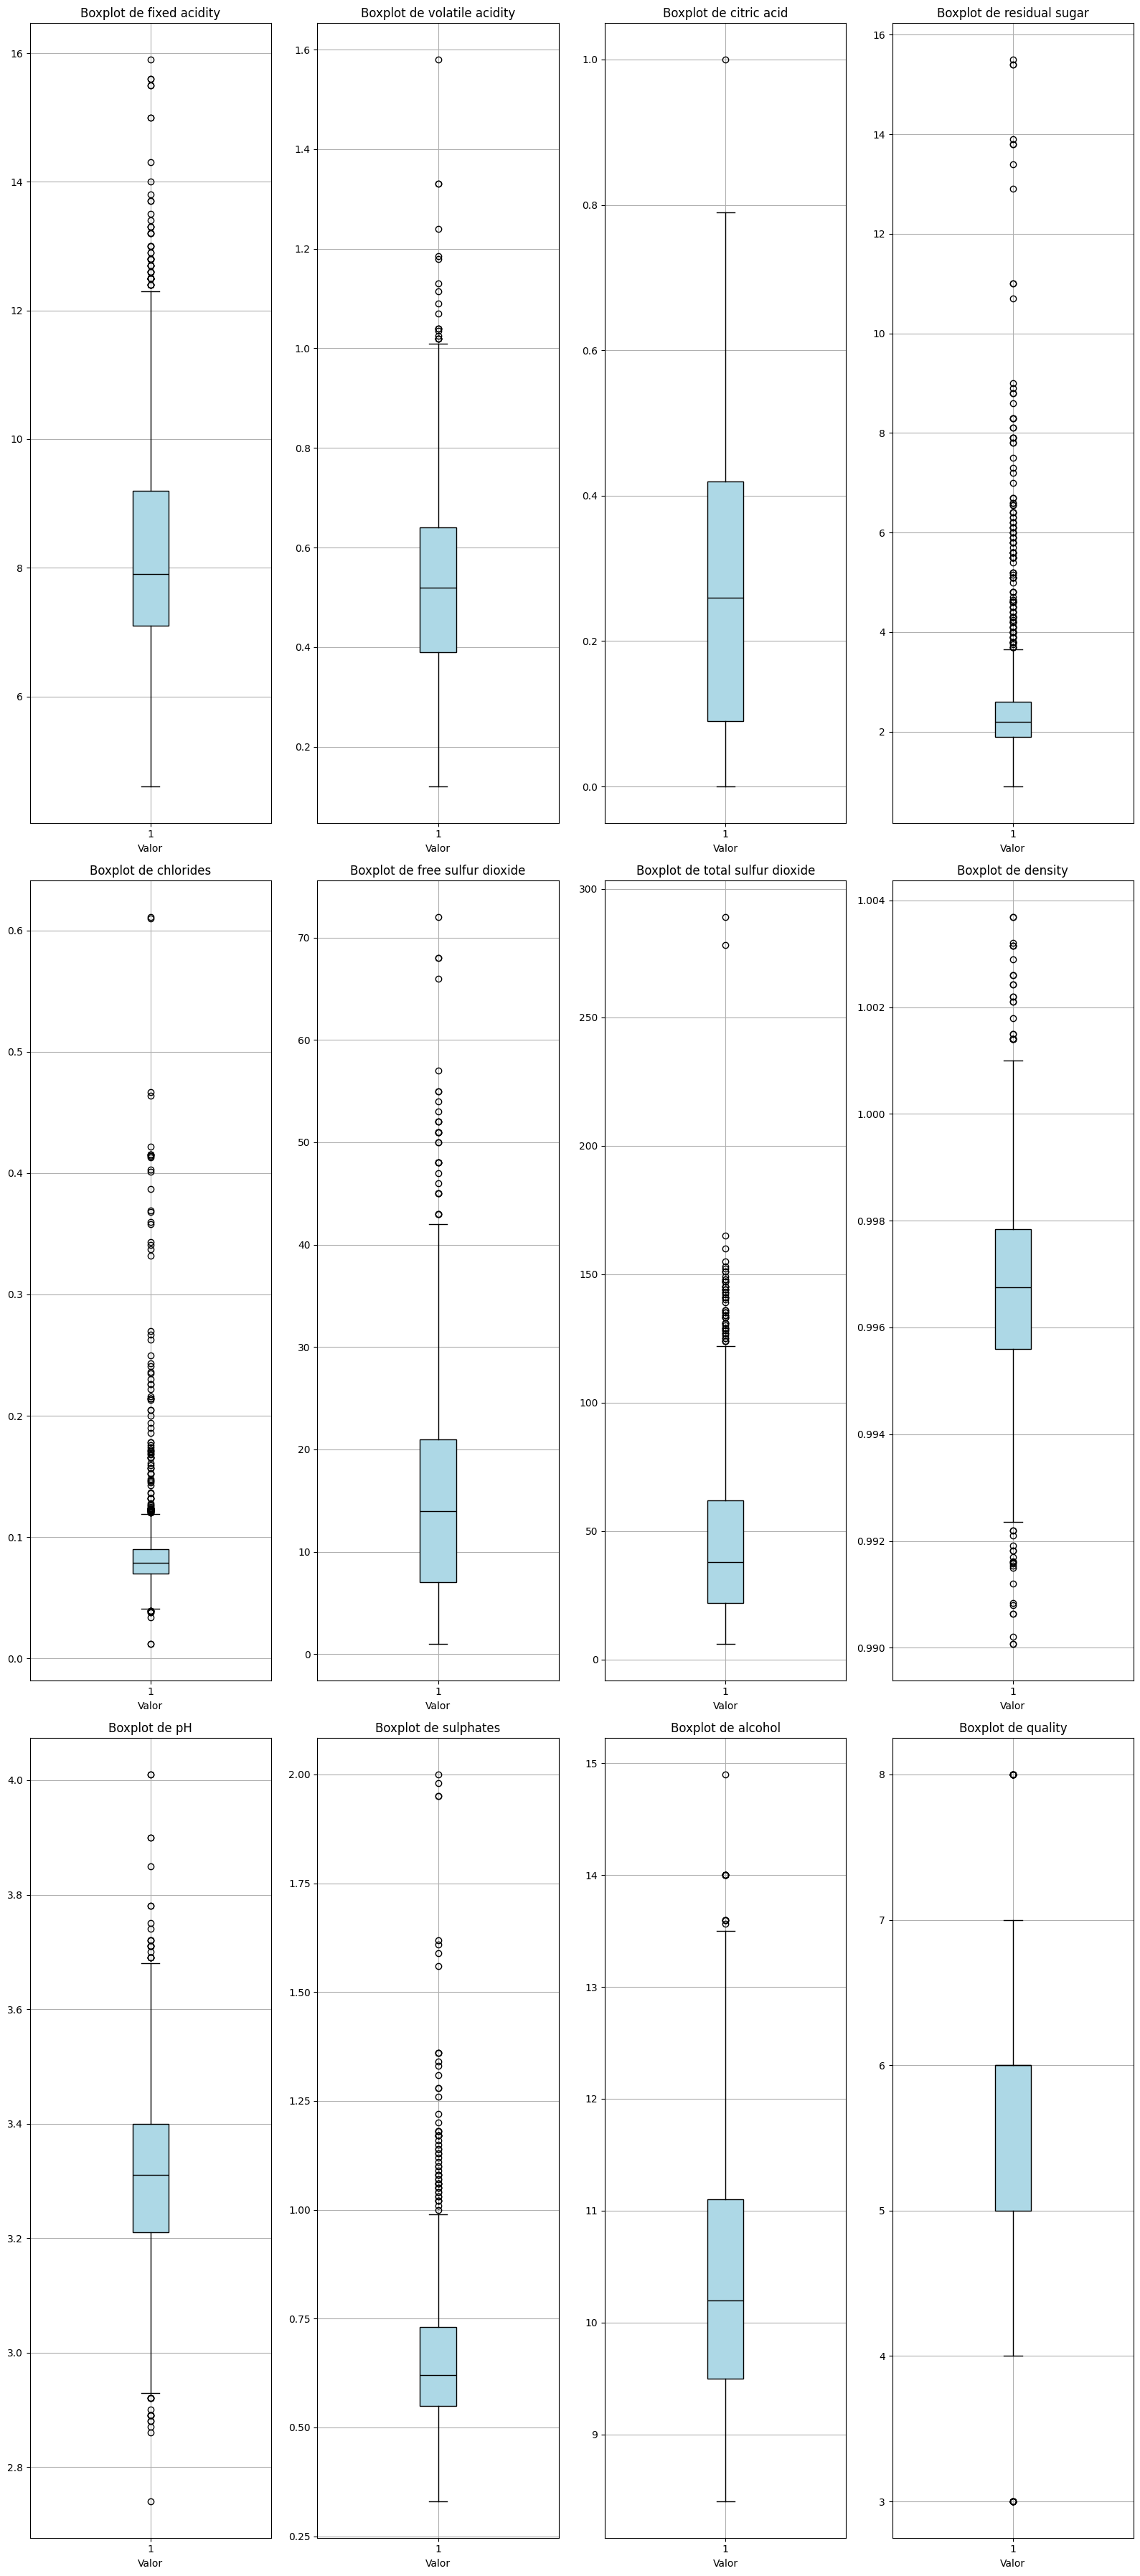

In [ ]:
# Verificacion de outliers
num_cols = df.select_dtypes(include=[np.number]).shape[1]
ncols = 4
nrows = -(-num_cols // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 12 * nrows))
axes = axes.flatten()

# Variables numericas separadas
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    datos_columna = pd.to_numeric(df[col], errors='coerce')
    if datos_columna.dropna().shape[0] > 0:  # Verificar que los valores sean válidos
        axes[i].boxplot(datos_columna.dropna(), vert=True, patch_artist=True, 
                        boxprops=dict(facecolor='lightblue'),
                        medianprops=dict(color='black'))
        axes[i].set_title(f'Boxplot de {col}')
        axes[i].set_xlabel('Valor')
        axes[i].grid(True)
plt.tight_layout()
plt.show()